In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('train.csv')
df.isnull().sum()

print("\nInformazioni Data Frame Movie\n\n")



Informazioni Data Frame Movie




In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


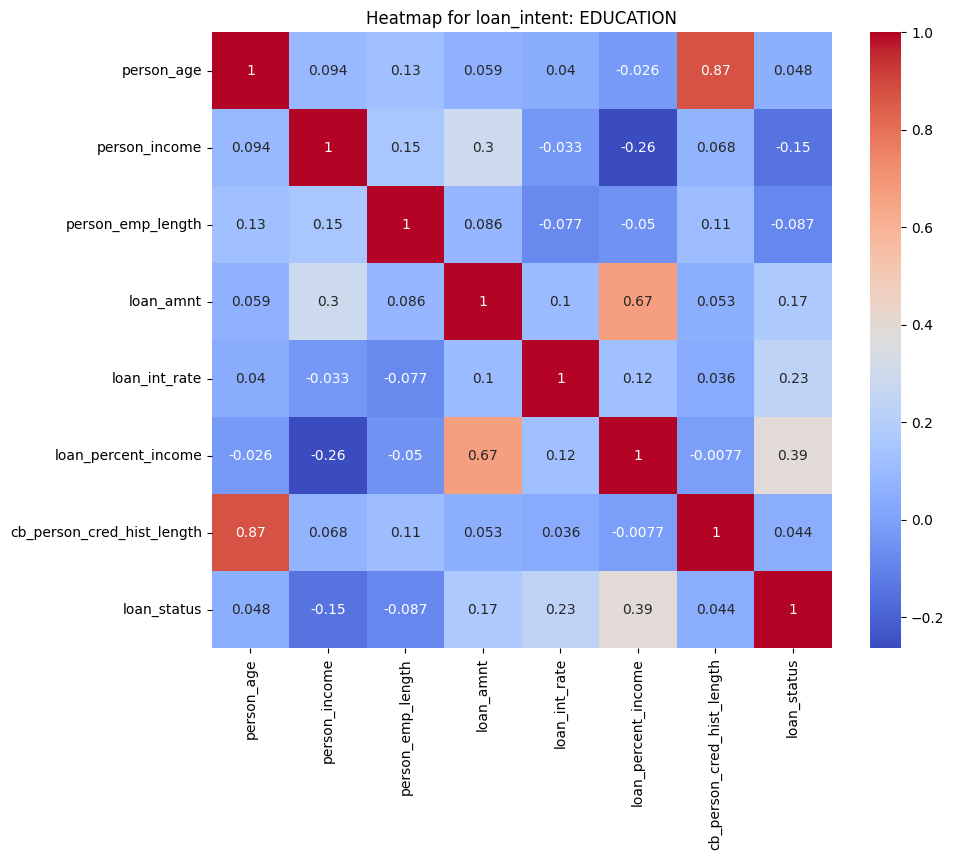

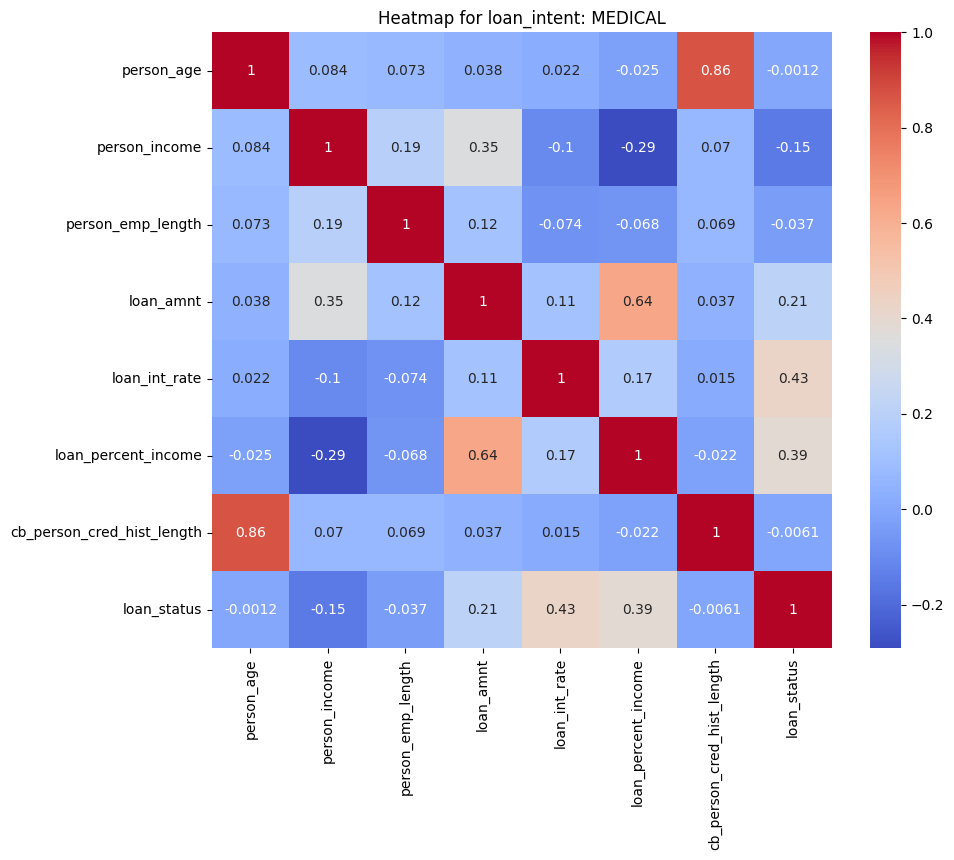

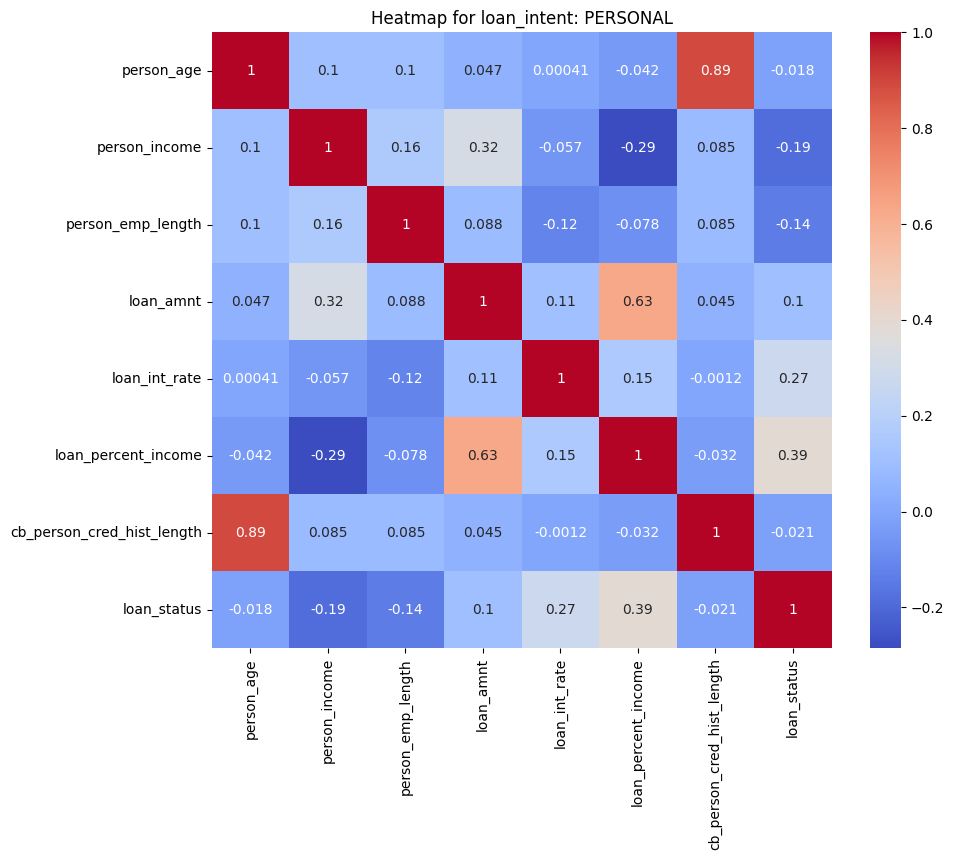

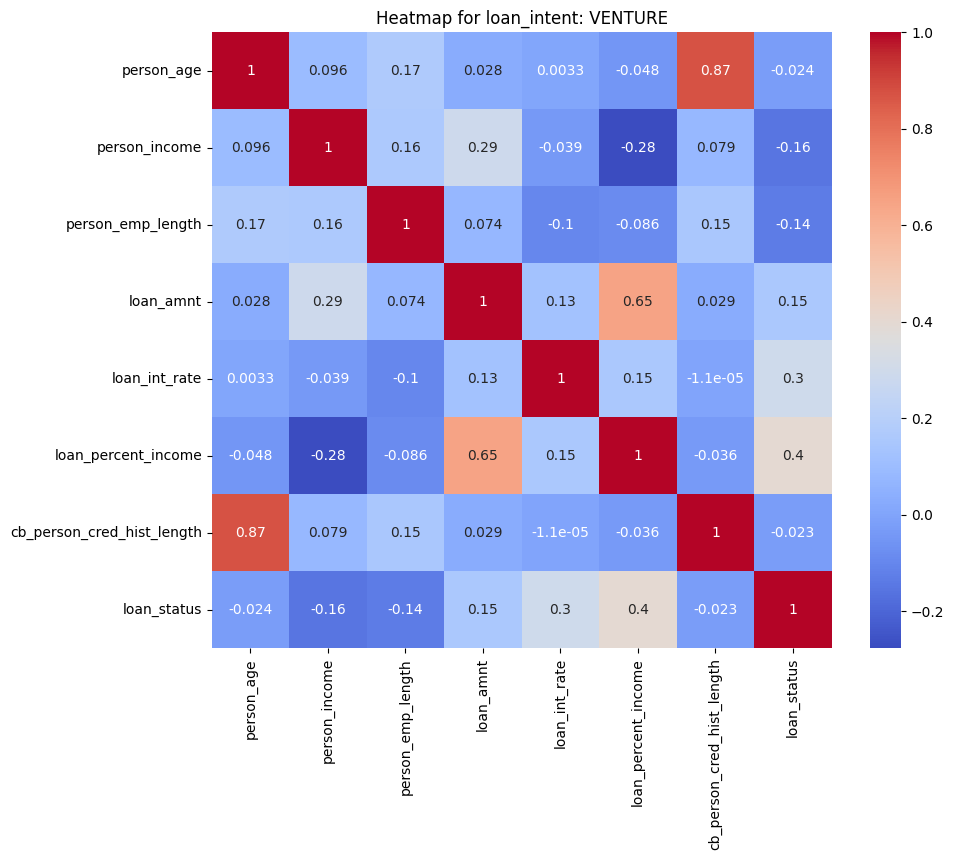

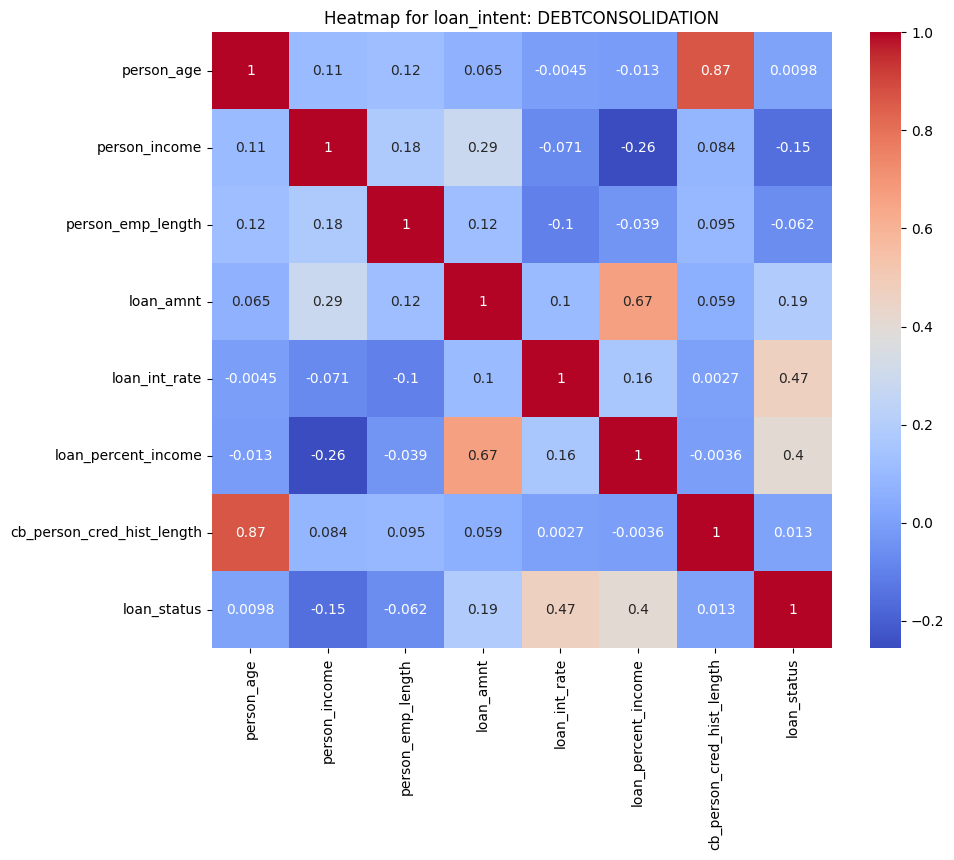

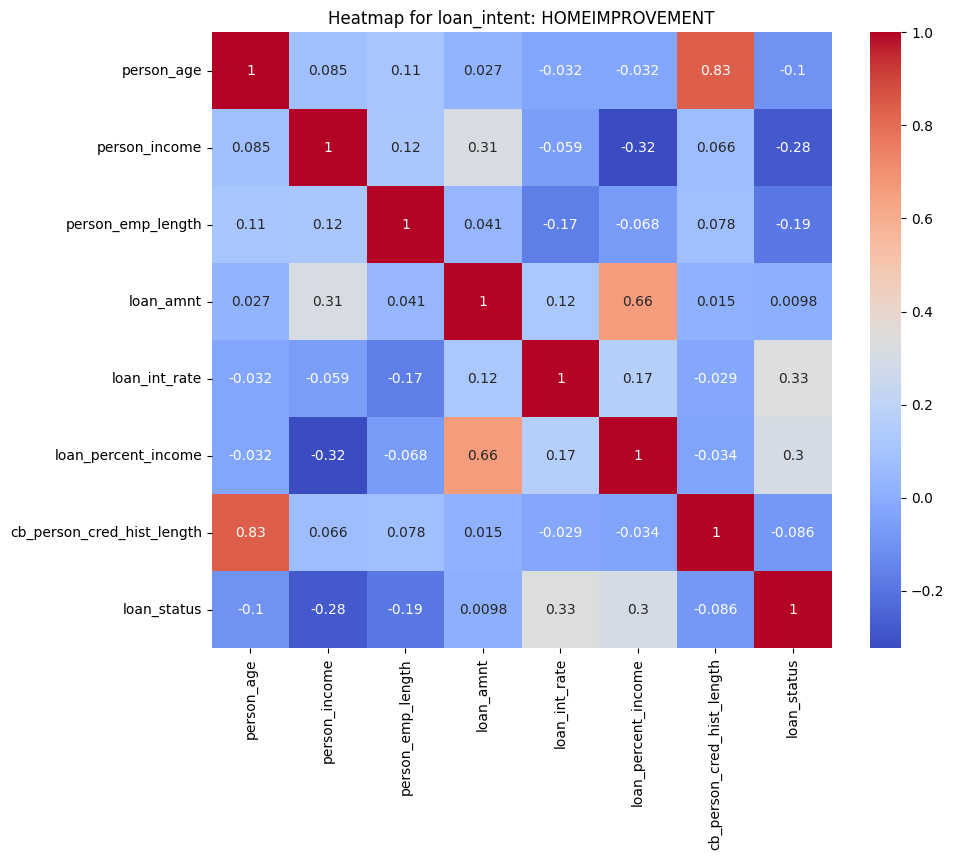

In [6]:
def analyze_and_plot_fixed(dataframe, group_col, base_path):
    # Lista per DataFrame filtrati e correlazioni
    filtered_corr_list = []
    
    # Valori unici della colonna
    unique_values = dataframe[group_col].unique()
    
    for value in unique_values:
        # Filtra il DataFrame
        df_filtered = dataframe[dataframe[group_col] == value]
        
        if df_filtered.empty:
            continue  # Salta se il DataFrame è vuoto
        
        # Nome del gruppo
        group_name = str(df_filtered[group_col].iloc[0]).replace("/", "-")  # Gestione di caratteri speciali
        
        # Rimuovi le colonne non necessarie
        df_cleaned = df_filtered.drop(['id','person_home_ownership','loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1, errors='ignore')
        
        
        
        # Calcola la matrice di correlazione
        corr_matrix = df_cleaned.corr()
        
        # Filtra correlazioni significative
        filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3)) & (corr_matrix != 1)).stack()
        filtered_corr_list.append((f'{group_col} name: {group_name}\n', filtered))
        
        # Crea la directory per salvare le immagini
        save_path = os.path.join(base_path, group_col)
        os.makedirs(save_path, exist_ok=True)
        
        # Plotta la heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {group_col}: {group_name}')
        
        # # Salva il grafico
        # plt.savefig(f'{save_path}/{group_name}_heatmap.png', bbox_inches='tight')
        # plt.close()  # Chiudi il grafico per evitare conflitti
        
    return filtered_corr_list

# Applica la funzione corretta
base_path = './image'
filtered_corr_intent = analyze_and_plot_fixed(df,'loan_intent', base_path)